<a href="https://colab.research.google.com/github/swarnaliiiiii/DataS_assignment/blob/main/DataS(part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



		Independent features of Dataset: 
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  


		Dependent features of Dataset: 
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64
Classification Model Accuracy is:  0.7704918032786885
Average precision-recall score: 0.71
Macro F1 Score:  0.7674291938997821
Micro F1 Score:  0.7704918032786885
Weighted F1 Score:  0.7687417407764563
              precision    recall  f1-score   support

     class 0       0.80      0.69   

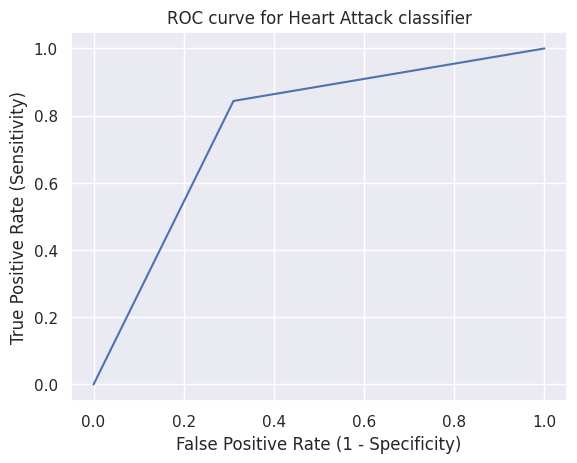

In [ ]:
#5: MODEL EVALUATION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
sns.set()

df = pd.read_csv("/content/drive/MyDrive/dataset/heart.csv")

#print(df.info())
#print(df.head())
#print(df.describe())
#df.shape
#print(df.isna().sum())
#var = 'target'
#ns.countplot(df[var])
#var = 'age'
#f, ax = plt.subplots(figsize=(15,8))
#sns.distplot(df[var])
#plt.xlim([0,80])
#var = 'chol'
#f, ax = plt.subplots(figsize=(15,8))
#sns.distplot(df[var])
#plt.xlim([0,600])
#var = 'trestbps'
#f, ax = plt.subplots(figsize=(15,8))
#sns.distplot(df[var])
#plt.xlim([0,250])
df.columns
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print("\n\n\t\tIndependent features of Dataset: ")
print(X.head())
print("\n\n\t\tDependent features of Dataset: ")
print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 25)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Classification Model Accuracy is: ",metrics.accuracy_score(y_test, y_pred))
import scikitplot as skplt
#skplt.metrics.plot_confusion_matrix(y_test,y_pred)

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

from sklearn.metrics import f1_score
print("Macro F1 Score: ",f1_score(y_test, y_pred, average='macro'))
print("Micro F1 Score: ",f1_score(y_test, y_pred, average='micro'))
print("Weighted F1 Score: ",f1_score(y_test, y_pred, average='weighted'))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.title('ROC curve for Heart Attack classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
pip install -q scikit-plot

In [ ]:
#Demonstrate  Estimation Model Evaluation and Stepwise Regression Using Python

import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from itertools import combinations

# Load your dataset (replace 'data.csv' with your actual file path)
data = pd.read_csv('/content/drive/MyDrive/dataset/fuel_dataset.csv')

# Define the response variable
y = data['Fuel_inL']

# Define the predictor variables (including 'distance_km', 'fuel_type', 'vehicle_id')
X = data[['Vehicle_ID','Fuel_Type','Distance_inKm ']]

# Drop 'vehicle_id' since it's not a predictor
X = X.drop('Vehicle_ID', axis=1)

# Encode 'fuel_type' as binary (petrol = 1, diesel = 0)
X['Fuel_Type'] = (X['Fuel_Type'] == 'petrol').astype(int)

# Function for forward stepwise selection
def forward_stepwise_selection(X, y):
    selected_vars = []
    remaining_vars = set(X.columns)

    while remaining_vars:
        models = []
        for var in remaining_vars:
            predictors = selected_vars + [var]
            X_subset = X[predictors]
            X_subset = sm.add_constant(X_subset)
            model = sm.OLS(y, X_subset).fit()
            models.append((model.aic, var))

        models.sort()
        best_aic, best_var = models[0]
        selected_vars.append(best_var)
        remaining_vars.remove(best_var)

    return selected_vars

# Perform forward stepwise selection
selected_predictors = forward_stepwise_selection(X, y)

# Fit the final model with the selected predictors
final_model = sm.OLS(y, sm.add_constant(X[selected_predictors])).fit()

# Display the summary of the final model
print(final_model.summary())


from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'final_model' is the model you obtained from the previous steps

# Make predictions on the training set
y_pred = final_model.predict(sm.add_constant(X[selected_predictors]))

# Evaluate the model
r_squared = final_model.rsquared
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# Display evaluation metrics
print(f'R-squared: {r_squared:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')



                            OLS Regression Results                            
Dep. Variable:               Fuel_inL   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     12.25
Date:                Thu, 28 Dec 2023   Prob (F-statistic):            0.00808
Time:                        15:01:35   Log-Likelihood:                -23.218
No. Observations:                  10   AIC:                             50.44
Df Residuals:                       8   BIC:                             51.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             22.1576      3.305      6.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [3]:
#to Perform Logistic Regression Using Python

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/drive/MyDrive/dataset/fitbit.csv')

# Drop 'activity_profile' and 'Id'
df = df.drop(['activity_profile', 'Id'], axis=1)

# Encode 'sleep_profile' as categories
label_encoder = LabelEncoder()
df['sleep_profile'] = label_encoder.fit_transform(df['sleep_profile'])

# Define features and target variable
X = df.drop('sleep_profile', axis=1)
y = df['sleep_profile']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a logistic regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg_model.predict(X_test)

# Evaluate the logistic regression model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8000
Confusion Matrix:
[[0 0 0]
 [1 0 0]
 [0 0 4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         4

    accuracy                           0.80         5
   macro avg       0.33      0.33      0.33         5
weighted avg       0.80      0.80      0.80         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [11]:
#to Perform Poisson Regression Using Python

import pandas as pd
import numpy as np
import statsmodels.api as sm

df = pd.read_csv('/content/drive/MyDrive/dataset/fitbit.csv')

# Drop 'activity_profile' and 'Id'
df = df.drop(['activity_profile', 'Id'], axis=1)

# Ensure 'TotalMinutesAsleep' is of integer type
df['TotalMinutesAsleep'] = df['TotalMinutesAsleep'].astype(int)

# Encode 'sleep_profile' as categories
df = pd.get_dummies(df, columns=['sleep_profile'], prefix='sleep')

# Define features and target variable
X = df.drop('TotalMinutesAsleep', axis=1)
y = df['TotalMinutesAsleep']

# Add a constant term to the features for the intercept
X = sm.add_constant(X)

# Convert data to NumPy arrays
X_np = X.to_numpy(dtype=np.float64)
y_np = y.to_numpy(dtype=np.float64)

# Fit Poisson regression model
poisson_model = sm.GLM(y_np, X_np, family=sm.families.Poisson()).fit()

# Display the summary of the Poisson regression model
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   24
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -506.31
Date:                Fri, 29 Dec 2023   Deviance:                       828.92
Time:                        09:29:25   Pearson chi2:                     655.
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6364      0.021    223.111      0.0

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:116: RuntimeWarning: invalid value encountered in divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])


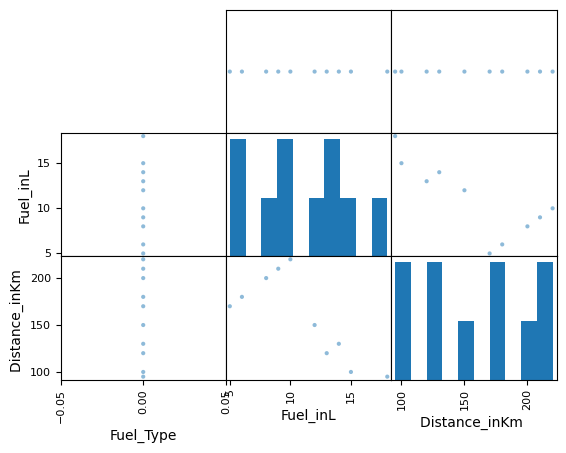

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Variance Inflation Factor (VIF):
         Variable        VIF
0           const  95.056136
1       Fuel_Type        NaN
2        Fuel_inL   2.531101
3  Distance_inKm    2.531101


In [20]:
#Demonstrate How you will Identify Multicollinearity Python

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# Load the fuel dataset (replace 'fuel_dataset.csv' with the actual path to your dataset)
data = pd.read_csv('/content/drive/MyDrive/dataset/fuel_dataset.csv')

# Replace these columns with your actual predictor variable names
predictor_columns = ["Fuel_Type", "Fuel_inL", "Distance_inKm "]

# Encode 'Fuel_Type' as binary (petrol = 1, diesel = 0)
data['Fuel_Type'] = (data['Fuel_Type'] == 'petrol').astype(int)

# Extract the predictor variables into their own data frame
X = pd.DataFrame(data[predictor_columns])

# Create a scatterplot matrix
pd.plotting.scatter_matrix(X)
plt.show()

# Add the constant term
X = sm.add_constant(X)

# Calculate VIF values
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
vif_results = pd.DataFrame({'Variable': X.columns, 'VIF': vif_values})
print("Variance Inflation Factor (VIF):")
print(vif_results)


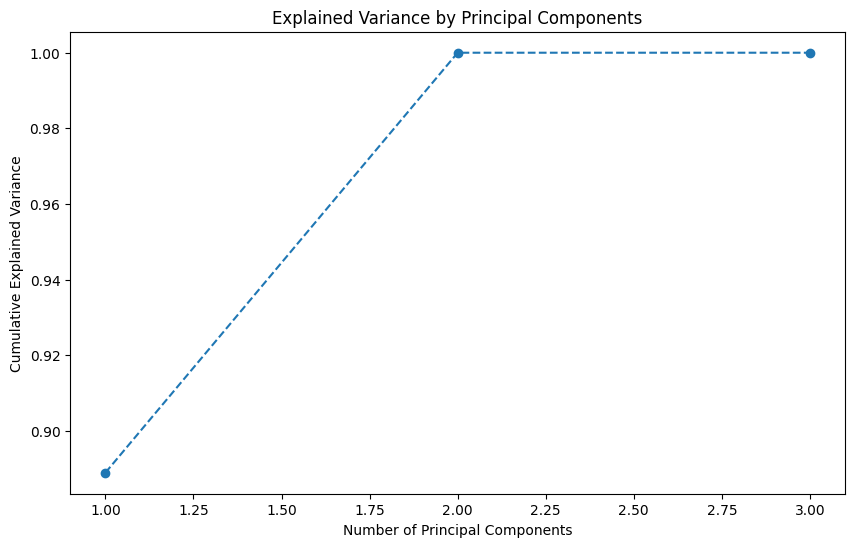

DataFrame with Principal Components:
        PC1       PC2
0  0.303279 -0.057096
1 -1.238081 -0.156956
2  1.664451  0.222951
3 -1.270212  0.531663
4  0.991898 -0.089227
5 -1.205950 -0.845575
6  2.287075 -0.235550
7 -1.286277  0.875972
8  0.975832  0.255082
9 -1.222015 -0.501265


In [21]:
#Demonstrate HOW you’ll apply PRINCIPAL COMPONENTS ANALYSIS Using Python

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the fuel dataset (replace 'fuel_dataset.csv' with the actual path to your dataset)
data = pd.read_csv('/content/drive/MyDrive/dataset/fuel_dataset.csv')

# Replace these columns with your actual predictor variable names
predictor_columns = ["Fuel_Type", "Fuel_inL", "Distance_inKm "]

# Encode 'Fuel_Type' as binary (petrol = 1, diesel = 0)
data['Fuel_Type'] = (data['Fuel_Type'] == 'petrol').astype(int)

# Extract the predictor variables into their own data frame
X = pd.DataFrame(data[predictor_columns])

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Select the number of components based on the plot
n_components = 2  # You can choose the number of components based on the plot

# Fit PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame with the principal components
columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data=X_pca, columns=columns)

# Display the DataFrame with principal components
print("DataFrame with Principal Components:")
print(df_pca)


In [22]:
#How to Mine Association Rules Using Python

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Create a sample dataset
dataset = [['Milk', 'Bread', 'Eggs'],
           ['Bread', 'Butter', 'Jam'],
           ['Milk', 'Eggs', 'Butter', 'Bread'],
           ['Milk', 'Jam'],
           ['Bread', 'Eggs', 'Butter']]

# Convert the dataset to a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
    support               itemsets
0       0.8                (Bread)
1       0.6               (Butter)
2       0.6                 (Eggs)
3       0.4                  (Jam)
4       0.6                 (Milk)
5       0.6        (Bread, Butter)
6       0.6          (Bread, Eggs)
7       0.4          (Bread, Milk)
8       0.4         (Eggs, Butter)
9       0.4           (Milk, Eggs)
10      0.4  (Eggs, Bread, Butter)
11      0.4    (Bread, Milk, Eggs)

Association Rules:
      antecedents consequents  antecedent support  consequent support  \
0         (Bread)    (Butter)                 0.8                 0.6   
1        (Butter)     (Bread)                 0.6                 0.8   
2         (Bread)      (Eggs)                 0.8                 0.6   
3          (Eggs)     (Bread)                 0.6                 0.8   
4  (Butter, Eggs)     (Bread)                 0.4                 0.8   
5   (Bread, Milk)      (Eggs)                 0.4                 0.

In [23]:
# How to Apply the Confidence Difference Criterion Using Python

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Create a sample dataset
dataset = [['Milk', 'Bread', 'Eggs'],
           ['Bread', 'Butter', 'Jam'],
           ['Milk', 'Eggs', 'Butter', 'Bread'],
           ['Milk', 'Jam'],
           ['Bread', 'Eggs', 'Butter']]

# Convert the dataset to a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Apply Confidence Difference Criterion
confidence_diff_threshold = 0.2  # Set your desired confidence difference threshold
filtered_rules = rules[
    (rules['confidence'] - rules['antecedent support']) > confidence_diff_threshold
]

# Display the filtered association rules
print("\nFiltered Association Rules:")
print(filtered_rules)



Filtered Association Rules:
      antecedents consequents  antecedent support  consequent support  \
1        (Butter)     (Bread)                 0.6                 0.8   
3          (Eggs)     (Bread)                 0.6                 0.8   
4  (Butter, Eggs)     (Bread)                 0.4                 0.8   
5   (Bread, Milk)      (Eggs)                 0.4                 0.6   
6    (Milk, Eggs)     (Bread)                 0.4                 0.8   

   support  confidence      lift  leverage  conviction  zhangs_metric  
1      0.6         1.0  1.250000      0.12         inf       0.500000  
3      0.6         1.0  1.250000      0.12         inf       0.500000  
4      0.4         1.0  1.250000      0.08         inf       0.333333  
5      0.4         1.0  1.666667      0.16         inf       0.666667  
6      0.4         1.0  1.250000      0.08         inf       0.333333  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
#How to Apply the Confidence Quotient Criterion Using Python

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Create a sample dataset
dataset = [['Milk', 'Bread', 'Eggs'],
           ['Bread', 'Butter', 'Jam'],
           ['Milk', 'Eggs', 'Butter', 'Bread'],
           ['Milk', 'Jam'],
           ['Bread', 'Eggs', 'Butter']]

# Convert the dataset to a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Apply Confidence Quotient Criterion
confidence_quotient_threshold = 1.5  # Set your desired confidence quotient threshold
filtered_rules = rules[
    (rules['confidence'] / rules['antecedent support']) > confidence_quotient_threshold
]

# Display the filtered association rules
print("\nFiltered Association Rules:")
print(filtered_rules)



Filtered Association Rules:
      antecedents consequents  antecedent support  consequent support  \
1        (Butter)     (Bread)                 0.6                 0.8   
3          (Eggs)     (Bread)                 0.6                 0.8   
4  (Butter, Eggs)     (Bread)                 0.4                 0.8   
5   (Bread, Milk)      (Eggs)                 0.4                 0.6   
6    (Milk, Eggs)     (Bread)                 0.4                 0.8   

   support  confidence      lift  leverage  conviction  zhangs_metric  
1      0.6         1.0  1.250000      0.12         inf       0.500000  
3      0.6         1.0  1.250000      0.12         inf       0.500000  
4      0.4         1.0  1.250000      0.08         inf       0.333333  
5      0.4         1.0  1.666667      0.16         inf       0.666667  
6      0.4         1.0  1.250000      0.08         inf       0.333333  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
